In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('drive/My Drive/Personal Projects/Heart Disease Prediction/data/heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.shape

(1025, 14)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


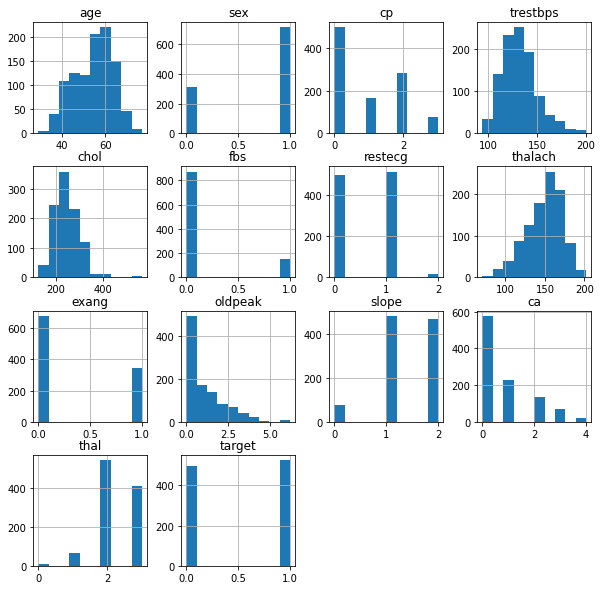

In [9]:
data.hist(figsize = (10, 10))
plt.show()

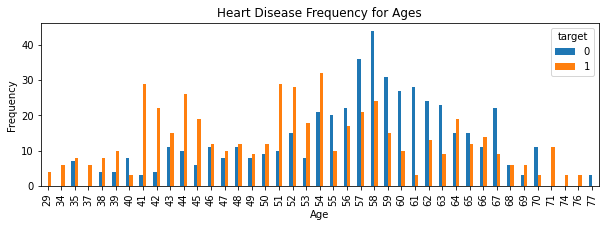

In [10]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(10,3))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

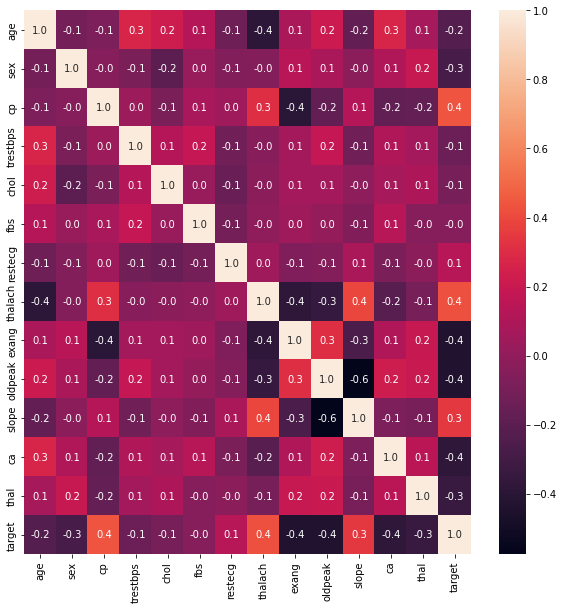

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

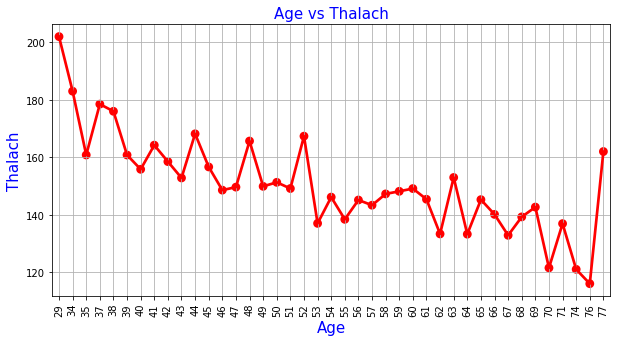

In [12]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
X = data.drop('target', axis=1)
y = data.target

In [15]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [16]:
X.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

In [17]:
def func(col):
    list = []
    dummies = pd.get_dummies(X[col])
    for i in range(len(X[col].value_counts())):
        list.append(col + '-' + str(i+1))
    dummies.columns=list
    return dummies

In [18]:
func('sex').isnull().sum()

sex-1    0
sex-2    0
dtype: int64

In [19]:
one_hot_encoded = pd.concat([func('sex'), func('cp'), func('fbs'), func('restecg'), func('exang'), func('thal')], axis=1)

In [20]:
X = X.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal'])

In [21]:
X = pd.concat([X, one_hot_encoded], axis=1).astype(float)

In [22]:
X

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex-1,sex-2,cp-1,...,fbs-2,restecg-1,restecg-2,restecg-3,exang-1,exang-2,thal-1,thal-2,thal-3,thal-4
0,52.0,125.0,212.0,168.0,1.0,2.0,2.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53.0,140.0,203.0,155.0,3.1,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,70.0,145.0,174.0,125.0,2.6,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,61.0,148.0,203.0,161.0,0.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,62.0,138.0,294.0,106.0,1.9,1.0,3.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,140.0,221.0,164.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1021,60.0,125.0,258.0,141.0,2.8,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1022,47.0,110.0,275.0,118.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1023,50.0,110.0,254.0,159.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex-1,sex-2,cp-1,...,fbs-2,restecg-1,restecg-2,restecg-3,exang-1,exang-2,thal-1,thal-2,thal-3,thal-4
835,49.0,118.0,149.0,126.0,0.8,2.0,3.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
137,64.0,180.0,325.0,154.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
534,54.0,108.0,267.0,167.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
495,59.0,135.0,234.0,161.0,0.5,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
244,51.0,125.0,245.0,166.0,2.4,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41.0,130.0,214.0,168.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
71,61.0,140.0,207.0,138.0,1.9,2.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
106,51.0,140.0,299.0,173.0,1.6,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
270,43.0,110.0,211.0,161.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_train.shape

(820, 24)

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras import regularizers

In [29]:
model = keras.models.Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['binary_accuracy']
)

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=10)

Epoch 1/30
82/82 [==============================] - 3s 17ms/step - loss: 0.7043 - binary_accuracy: 0.5268 - val_loss: 0.6856 - val_binary_accuracy: 0.5171
Epoch 2/30
82/82 [==============================] - 1s 12ms/step - loss: 0.6675 - binary_accuracy: 0.5854 - val_loss: 0.6676 - val_binary_accuracy: 0.5805
Epoch 3/30
82/82 [==============================] - 1s 11ms/step - loss: 0.6471 - binary_accuracy: 0.6280 - val_loss: 0.6459 - val_binary_accuracy: 0.6341
Epoch 4/30
82/82 [==============================] - 1s 9ms/step - loss: 0.6129 - binary_accuracy: 0.6890 - val_loss: 0.6177 - val_binary_accuracy: 0.6780
Epoch 5/30
82/82 [==============================] - 1s 10ms/step - loss: 0.6014 - binary_accuracy: 0.6939 - val_loss: 0.6153 - val_binary_accuracy: 0.6683
Epoch 6/30
82/82 [==============================] - 1s 11ms/step - loss: 0.5919 - binary_accuracy: 0.6866 - val_loss: 0.5997 - val_binary_accuracy: 0.7268
Epoch 7/30
82/82 [==============================] - 1s 9ms/step - loss:

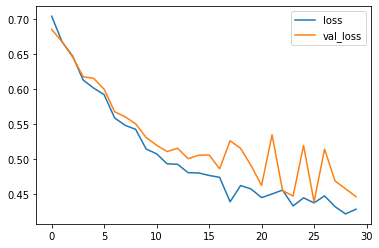

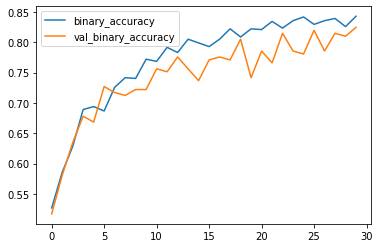

In [33]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [34]:
predicted = np.round(model.predict(X_test)).astype(int)

7/7 [==============================] - 0s 2ms/step


In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [36]:
binary_pred = np.round(model.predict(X_test)).astype(int)

print('Accuracy -', accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

7/7 [==============================] - 0s 2ms/step
Accuracy - 0.824390243902439
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       102
           1       0.77      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

